## Final Project--- SCM 516

**Section I** 

**Classification dataset:**
* Gender Classification Dataset
* https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [29]:
# read file
df_old=pd.read_csv(r"/Users/luns/Desktop/ASU/SCM516/TA/gender_classification_v7.csv")

In [31]:
# remove space
df_old.columns = df_old.columns.str.strip()
print(df_old.columns)

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [33]:
# check imported data
df_old.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


**Remove Outlier**

In [35]:
import pandas as pd

# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# Columns that are numeric
numeric_columns = df_old.select_dtypes(include=['float64', 'int64']).columns

# Apply outlier removal to create the cleaned DataFrame
df = remove_outliers_iqr(df_old, numeric_columns)

# Print the cleaned DataFrame
print("Cleaned DataFrame (df) without outliers:")
print(df)

Cleaned DataFrame (df) without outliers:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
4             1               13.5                 5.9          0          0   
5             1               13.0                 6.8          1          1   
6             1               15.3                 6.2          1          1   
8             1               11.9                 5.4          1          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

**Balance the data**

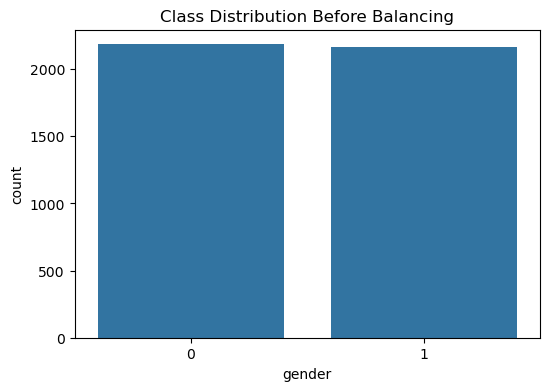

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Visualize the class distribution before balancing
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df_cleaned)
plt.title('Class Distribution Before Balancing')
plt.show()

* Data is alreay pretty balanced so no need to balanced the data again

In [41]:
print(df.columns)

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [130]:
# Calculate the median for 'forehead_width_cm' and 'forehead_height_cm'
forehead_width_median = df['forehead_width_cm'].median()
forehead_height_median = df['forehead_height_cm'].median()

# Create new columns 'forehead_width_category' and 'forehead_height_category' with 'Low' or 'High' values
df['forehead_width_category'] = ['Low' if val < forehead_width_median else 'High' for val in df['forehead_width_cm']]
df['forehead_height_category'] = ['Low' if val < forehead_height_median else 'High' for val in df['forehead_height_cm']]

In [128]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_category,forehead_height_category
0,1,11.8,6.1,1,0,1,1,Male,Low,High
4,1,13.5,5.9,0,0,0,0,Female,High,High
5,1,13.0,6.8,1,1,1,1,Male,Low,High
6,1,15.3,6.2,1,1,1,0,Male,High,High
8,1,11.9,5.4,1,0,1,1,Female,Low,Low


* Calculate the median for both forehead_width_cm and forehead_height_cm, and then classify the values as either "Low" or "High" based on whether they fall below or above the median.

### 1. Conditional Probability

**1-1 Single feature conditional probabilities:**

1. P(Gender = Male∣nose_wide = 1 )

In [65]:
male_nose_wide = df[(df['nose_wide'] == 1) & (df['gender'] == 'Male' )].shape[0]
nose_wide = df[(df['nose_wide'] == 1) ].shape[0]
probability = (male_nose_wide/ nose_wide)* 100
print(f"P(Gender = Male∣nose_wide = 1 ): {probability:.2f} %")

P(Gender = Male∣nose_wide = 1 ): 87.95 %


2. P(Gender = Male∣lips_thin = 1 )

In [68]:
male_lips_thin = df[(df['lips_thin'] == 1) & (df['gender'] == 'Male' )].shape[0]
lips_thin = df[(df['lips_thin'] == 1) ].shape[0]
probability = (male_lips_thin/ lips_thin)* 100
print(f"P(Gender = Male∣lips_thin = 1 ): {probability:.2f} %")

P(Gender = Male∣lips_thin = 1 ): 87.37 %


3. P(Gender = Male∣forehead_width_category = Low )

In [71]:
male_forehead_width_category = df[(df['forehead_width_category'] == 'Low') & (df['gender'] == 'Male' )].shape[0]
forehead_width_category = df[(df['forehead_width_category'] == 'Low') ].shape[0]
probability = (male_forehead_width_category/ forehead_width_category)* 100
print(f" P(Gender = Male∣forehead_width_category = Low )): {probability:.2f} %")

 P(Gender = Male∣forehead_width_category = Low )): 39.16 %


4. P(Gender = Female∣forehead_width_category = Low )

In [74]:
Female_forehead_width_category = df[(df['forehead_width_category'] == 'Low') & (df['gender'] == 'Female' )].shape[0]
forehead_width_category = df[(df['forehead_width_category'] == 'Low') ].shape[0]
probability = (Female_forehead_width_category/ forehead_width_category)* 100
print(f" P(Gender = Female∣forehead_width_category = Low ): {probability:.2f} %")

 P(Gender = Female∣forehead_width_category = Low ): 60.84 %


5.P(Gender = Male∣long_hair = 1 )

In [77]:
male_long_hair = df[(df['long_hair'] == 1) & (df['gender'] == 'Male' )].shape[0]
long_hair = df[(df['long_hair'] == 1) ].shape[0]
probability = (male_long_hair/ long_hair)* 100
print(f"P(Gender = Male∣long_hair = 1 ): {probability:.2f} %")

P(Gender = Male∣long_hair = 1 ): 49.78 %


5.P(Gender = Female∣long_hair = 1 )

In [80]:
Female_long_hair = df[(df['long_hair'] == 1) & (df['gender'] == 'Female' )].shape[0]
long_hair = df[(df['long_hair'] == 1) ].shape[0]
probability = (male_long_hair/ long_hair)* 100
print(f"P(Gender = Female∣long_hair = 1 ): {probability:.2f} %")

P(Gender = Female∣long_hair = 1 ): 49.78 %


6. P(Gender = Female∣forehead_width_category = High )

In [83]:
Female_forehead_width_category = df[(df['forehead_width_category'] == 'High') & (df['gender'] == 'Female' )].shape[0]
forehead_width_category = df[(df['forehead_width_category'] == 'High') ].shape[0]
probability = (Female_forehead_width_category/ forehead_width_category)* 100
print(f" P(Gender = Female∣forehead_width_category = Low )): {probability:.2f} %")

 P(Gender = Female∣forehead_width_category = Low )): 40.52 %


7. P(Gender = Female ∣ lips_thin = 1 )

In [86]:
Female_lips_thin = df[(df['lips_thin'] == 1) & (df['gender'] == 'Female' )].shape[0]
lips_thin = df[(df['lips_thin'] == 1) ].shape[0]
probability = (Female_lips_thin/ lips_thin)* 100
print(f"P(Gender = Female∣lips_thin = 1 ): {probability:.2f} %")

P(Gender = Female∣lips_thin = 1 ): 12.63 %


**1-2 Multiple feature conditional probabilities:**

1.P(Gender = Female ∣ nose_wide = 1,lips_thin = 1 )

In [90]:
nose_wide = df['nose_wide'] == 1
lips_thin = df['lips_thin'] == 1
female = df['gender'] == 'Female' 

female_nose_wide_lips_thin = df[female & nose_wide & lips_thin]

total_female_nose_wide_lips_thin = female_nose_wide_lips_thin.shape[0]

total_nose_wide_lips_thin = df[nose_wide & lips_thin].shape[0]

probability = (total_female_nose_wide_lips_thin / total_nose_wide_lips_thin) * 100
print(f"P(Gender = Female | nose_wide = 1, lips_thin = 1): {probability:.2f} %")

P(Gender = Female | nose_wide = 1, lips_thin = 1): 1.74 %


2. P(Gender = Male∣nose_wide = 1,forehead_width_category = low)

In [93]:
nose_wide = df['nose_wide'] == 1
forehead_width_low = df['forehead_width_category'] == 'Low'
male = df['gender'] == 'Male'

male_nose_wide_forehead_low = df[male & nose_wide & forehead_width_low]
total_male_nose_wide_forehead_low = male_nose_wide_forehead_low.shape[0]
total_nose_wide_forehead_low = df[nose_wide & forehead_width_low].shape[0]

probability = (total_male_nose_wide_forehead_low / total_nose_wide_forehead_low) * 100
print(f"P(Gender = Male | nose_wide = 1, forehead_width_category = low): {probability:.2f} %")


P(Gender = Male | nose_wide = 1, forehead_width_category = low): 83.39 %


3. P(Gender = Female∣nose_wide = 1,nose_long = 0)

In [96]:
nose_wide = df['nose_wide'] == 1
nose_long = df['nose_long'] == 0
female = df['gender'] == 'Female'

female_nose_wide_nose_short = df[female & nose_wide & nose_long]
total_female_nose_wide_nose_short = female_nose_wide_nose_short.shape[0]
total_nose_wide_nose_short = df[nose_wide & nose_long].shape[0]

probability = (total_female_nose_wide_nose_short / total_nose_wide_nose_short) * 100
print(f"P(Gender = Female | nose_wide = 1, nose_long = 0): {probability:.2f} %")

P(Gender = Female | nose_wide = 1, nose_long = 0): 52.49 %


4. P(Gender = Male∣forehead_width_cm = High,nose_long = 0)

In [99]:
forehead_width_high = df['forehead_width_category'] == 'High'
nose_short = df['nose_long'] == 0
male = df['gender'] == 'Male'

male_forehead_wide_nose_short = df[male & forehead_width_high & nose_short]
total_male_forehead_wide_nose_short = male_forehead_wide_nose_short.shape[0]
total_forehead_wide_nose_short = df[forehead_width_high & nose_short].shape[0]

probability = (total_male_forehead_wide_nose_short / total_forehead_wide_nose_short) * 100
print(f"P(Gender = Male | forehead_width_category = High, nose_long = 0): {probability:.2f} %")

P(Gender = Male | forehead_width_category = High, nose_long = 0): 16.14 %


5. P(Gender = Male ∣ forehead_width_category = High,forehead_height_category = Low)

In [102]:
forehead_width_category_high = df['forehead_width_category'] == 'High'
forehead_height_category_low = df['forehead_height_category'] == 'Low'
male = df['gender'] == 'Male'

male_forehead_wide_height_low = df[male & forehead_width_category_high & forehead_height_category_low]
total_male_forehead_wide_height_low = male_forehead_wide_height_low.shape[0]
total_forehead_wide_height_low = df[forehead_width_category_high & forehead_height_category_low].shape[0]

probability = (total_male_forehead_wide_height_low / total_forehead_wide_height_low) * 100
print(f"P(Gender = Male | forehead_width_category = High, forehead_height_category = Low): {probability:.2f} %")

P(Gender = Male | forehead_width_category = High, forehead_height_category = Low): 52.22 %


### 2. Feature/factor Importance


**- Feature importance using Naïve Bayes**

**Male**

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming the cleaned dataset is df and it contains the necessary features
X = df[['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
        'forehead_width_category', 'forehead_height_category']]
y = df['gender']  # Assuming 'Gender' is in the form of Male or Female

# Encode categorical features if necessary (e.g., Gender, forehead levels)
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Male': 0, 'Female': 1})  # Map Male = 0, Female = 1 for consistency

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# List of categorical features we want to analyze
categorical_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
                        'forehead_width_category', 'forehead_height_category']

# Function to calculate probabilities for categorical features
def calculate_conditional_probabilities(feature, target):
    feature_values = df[feature].unique()  # Get unique values of the feature (e.g., Low, High for forehead categories)
    
    for value in feature_values:
        subset_data = df[df[feature] == value]
        if subset_data.shape[0] > 0:
            p_male = subset_data[target].value_counts(normalize=True).get(0, 0)  # P(Gender = Male) where Male is 0
            print(f"P(Gender = Male | {feature} = {value}): {p_male:.2f}")
        else:
            print(f"No data for {feature} = {value}")
    
    # Calculate the absolute difference in probabilities between feature values if there are exactly two values
    if len(feature_values) == 2:
        prob_1 = df[df[feature] == feature_values[0]]['gender'].value_counts(normalize=True).get(0, 0)
        prob_2 = df[df[feature] == feature_values[1]]['gender'].value_counts(normalize=True).get(0, 0)
        diff_in_probabilities = abs(prob_1 - prob_2)  # Use absolute value to avoid negative differences
        print(f"Absolute difference in probabilities for {feature}: {diff_in_probabilities:.2f}\n")

# Calculate the conditional probabilities for each feature in the dataset
for feature in categorical_features:
    print(f"\nCalculating for {feature}:")
    calculate_conditional_probabilities(feature, 'gender')


Calculating for long_hair:
P(Gender = Male | long_hair = 1): 0.50

Calculating for nose_wide:
P(Gender = Male | nose_wide = 1): 0.88
P(Gender = Male | nose_wide = 0): 0.88
Absolute difference in probabilities for nose_wide: 0.00


Calculating for nose_long:
P(Gender = Male | nose_long = 0): 0.88
P(Gender = Male | nose_long = 1): 0.86
Absolute difference in probabilities for nose_long: 0.02


Calculating for lips_thin:
P(Gender = Male | lips_thin = 1): 0.87
P(Gender = Male | lips_thin = 0): 0.87
Absolute difference in probabilities for lips_thin: 0.00


Calculating for distance_nose_to_lip_long:
P(Gender = Male | distance_nose_to_lip_long = 1): 0.88
P(Gender = Male | distance_nose_to_lip_long = 0): 0.88
Absolute difference in probabilities for distance_nose_to_lip_long: 0.00


Calculating for forehead_width_category:
P(Gender = Male | forehead_width_category = Low): 0.61
P(Gender = Male | forehead_width_category = High): 0.59
Absolute difference in probabilities for forehead_width_cate

/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/3730203437.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_male = subset_data[target].value_counts(normalize=True).get(0, 0)  # P(Gender = Male) where Male is 0
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/3730203437.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_male = subset_data[target].value_counts(normalize=True).get(0, 0)  # P(Gender = Male) where Male is 0
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/3730203437.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated.

**Female**

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming the cleaned dataset is df and it contains the necessary features
X = df[['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
        'forehead_width_category', 'forehead_height_category']]
y = df['gender']  # Assuming 'Gender' is in the form of Male or Female

# Encode categorical features if necessary (e.g., Gender, forehead levels)
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Male': 0, 'Female': 1})  # Map Male = 0, Female = 1 for consistency

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# List of categorical features we want to analyze
categorical_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
                        'forehead_width_category', 'forehead_height_category']

# Function to calculate probabilities for categorical features
def calculate_conditional_probabilities(feature, target):
    binary_values = [0, 1]  # Handle binary features like long_hair, nose_wide explicitly
    if feature in ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']:
        feature_values = binary_values
    else:
        feature_values = df[feature].unique()  # For categorical features like Low, High
    
    for value in feature_values:
        subset_data = df[df[feature] == value]
        if subset_data.shape[0] > 0:
            p_female = subset_data[target].value_counts(normalize=True).get(1, 0)  # P(Gender = Female) where Female is 1
            print(f"P(Gender = Female | {feature} = {value}): {p_female:.2f}")
        else:
            print(f"No data for {feature} = {value}")
    
    # Calculate the absolute difference in probabilities between feature values if there are exactly two values
    if len(feature_values) == 2:
        prob_1 = df[df[feature] == feature_values[0]]['gender'].value_counts(normalize=True).get(1, 0)
        prob_2 = df[df[feature] == feature_values[1]]['gender'].value_counts(normalize=True).get(1, 0)
        diff_in_probabilities = abs(prob_1 - prob_2)  # Use absolute value to avoid negative differences
        print(f"Absolute difference in probabilities for {feature}: {diff_in_probabilities:.2f}\n")

# Calculate the conditional probabilities for each feature in the dataset
for feature in categorical_features:
    print(f"\nCalculating for {feature}:")
    calculate_conditional_probabilities(feature, 'gender')


Calculating for long_hair:
No data for long_hair = 0
P(Gender = Female | long_hair = 1): 0.50
Absolute difference in probabilities for long_hair: 0.50


Calculating for nose_wide:
P(Gender = Female | nose_wide = 0): 0.12
P(Gender = Female | nose_wide = 1): 0.12
Absolute difference in probabilities for nose_wide: 0.00


Calculating for nose_long:
P(Gender = Female | nose_long = 0): 0.12
P(Gender = Female | nose_long = 1): 0.14
Absolute difference in probabilities for nose_long: 0.02


Calculating for lips_thin:
P(Gender = Female | lips_thin = 0): 0.13
P(Gender = Female | lips_thin = 1): 0.13
Absolute difference in probabilities for lips_thin: 0.00


Calculating for distance_nose_to_lip_long:
P(Gender = Female | distance_nose_to_lip_long = 0): 0.12
P(Gender = Female | distance_nose_to_lip_long = 1): 0.12
Absolute difference in probabilities for distance_nose_to_lip_long: 0.00


Calculating for forehead_width_category:
P(Gender = Female | forehead_width_category = Low): 0.39
P(Gender = F

/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/139926033.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_female = subset_data[target].value_counts(normalize=True).get(1, 0)  # P(Gender = Female) where Female is 1
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/139926033.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_1 = df[df[feature] == feature_values[0]]['gender'].value_counts(normalize=True).get(1, 0)
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/139926033.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

**- Feature importance using Random Forest**

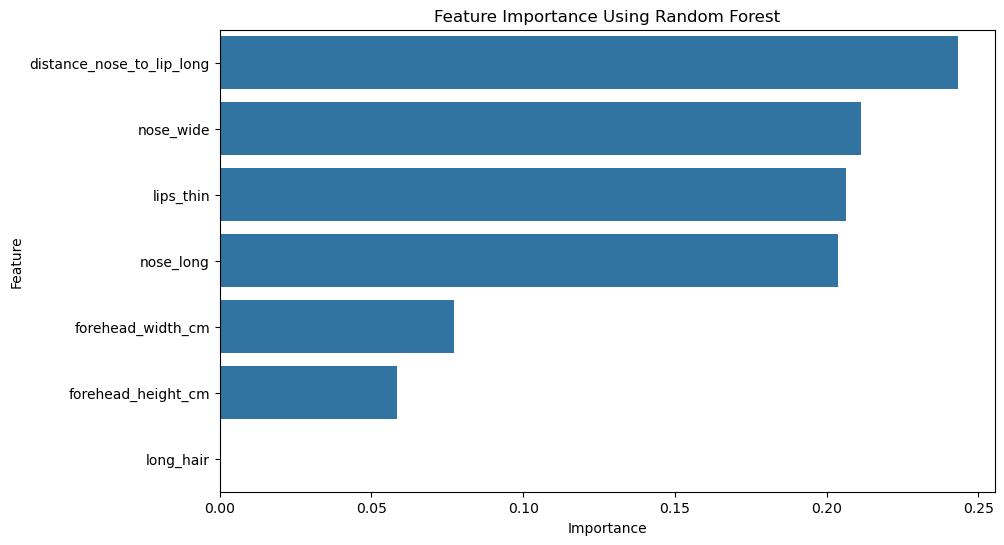

In [154]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature set (X) and the target variable (y)
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 
        'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]

y = df['gender']  # Target variable

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X, y)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Using Random Forest')
plt.show()

### 3. Machine Learning algorithms 

**Confusion matrix for Naïve Bayes, Decision Tree, Random Forest, and KNN**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define features (X) and target (y)
X = df.drop(columns=['gender'])  # Features
y = df['g']  # Target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")


**ROC Curve for Training Data:**

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve for training data
disp = RocCurveDisplay.from_estimator(nb_model, X_train, y_train)
RocCurveDisplay.from_estimator(dt_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_train, y_train, ax=disp.ax_)

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.title("ROC Curve for Training Dataset")
plt.show()

**ROC Curve for Testing Data:**

In [ ]:
# Plot ROC curve for testing data
disp = RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax=disp.ax_)

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.title("ROC Curve for Testing Dataset")
plt.show()

**Optimal K Value for KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# List to store the error rates
error = []

# Loop through values of K from 1 to 20
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # Calculate accuracy and append the error rate (1 - accuracy)
    accuracy = balanced_accuracy_score(y_test, pred_i)
    error.append(1 - accuracy)

# Plot the error rates for different K values
plt.figure(figsize=(12,6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Finding Optimal K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))  # Set the ticks on the X-axis
plt.show()

**Optimal K Value for KNN**

* In the plot above, the error rate decreases significantly up to K=5, where it stabilizes and shows relatively low error. Therefore, K=5 is likely the optimal K value for this model, as it minimizes the error while maintaining model performance.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Lists to store accuracy for different K values
train_accuracies = []
test_accuracies = []

# Loop through K values from 1 to 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions for train and test sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Output the accuracies for each K value with formatting for readability
for k in range(1, 11):
    print(f'K = {k}: Train Accuracy = {train_accuracies[k-1]:.2f}, Test Accuracy = {test_accuracies[k-1]:.2f}')

**Which algorithm performed the best, and why?**

* The Naive Bayes and Random Forest models performed the best, with similar accuracy (0.97) and almost identical precision, recall, and F1-scores. The Random Forest edges out slightly due to its marginally higher precision (0.98 for Female), making it the best-performing model overall in this case.


**Conclusion:**
* No Overfitting: There are no strong signs of overfitting in the Random Forest model's results based on the metrics provided. 

In [156]:
new_observations_2 = pd.DataFrame({
    'long_hair': [0, 1, 0, 1],
    'forehead_width_cm': [16, 17, 12, 18],
    'forehead_height_cm': [7, 8, 6, 10],
    'nose_wide': [1, 0, 1, 1],
    'nose_long': [1, 1, 1, 0],
    'lips_thin': [0, 1, 0, 1],
    'distance_nose_to_lip_long': [0, 1, 1, 0]
})

# Make predictions on this new dataset using the trained model
predictions_2 = rf_model.predict(new_observations_2)

# Convert numerical predictions back to their original labels (0: Female, 1: Male)
predicted_genders_2 = ['Female' if pred == 0 else 'Male' for pred in predictions_2]

ordinals = ['first', 'second', 'third', 'fourth']

for i, gender in enumerate(predicted_genders_2):
    print(f"The {ordinals[i]} observation is predicted to be {gender}.")

The first observation is predicted to be Male.
The second observation is predicted to be Male.
The third observation is predicted to be Male.
The fourth observation is predicted to be Male.


* The first observation is predicted to be Male.

* The second observation is predicted to be Male.

* The third observation is predicted to be Male.

* The fourth observation is predicted to be Male.

# Bank Loan (Regression)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('/Users/vivek/Desktop/University/DPA- SCM 516/Submissions/Team Assignment 2/bankloan.csv')

In [6]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [7]:
# List of numeric columns to check for outliers
numeric_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

In [8]:
# Print the shape of the dataset before removing outliers
print("Shape before removing outliers:", df.shape)

Shape before removing outliers: (5000, 14)


In [9]:
# Remove outliers from each numeric column
for column in numeric_columns:
    df = remove_outliers(df, column)

# Reset the index after removing outliers
df = df.reset_index(drop=True)

# Print the shape of the dataset after removing outliers
print("Shape after removing outliers:", df.shape)

# Save the cleaned dataset
df.to_csv('/Users/vivek/Desktop/University/DPA- SCM 516/Submissions/Team Assignment 2/bankloan_cleaned.csv', index=False)
print("Cleaned dataset saved as 'bankloan_cleaned.csv'")

Shape after removing outliers: (4374, 14)
Cleaned dataset saved as 'bankloan_cleaned.csv'


In [10]:
# Display the first few rows of the cleaned dataset
print(df.head())

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [11]:
# Display summary statistics of the cleaned dataset
print(df.describe())

                ID          Age   Experience       Income      ZIP.Code  \
count  4374.000000  4374.000000  4374.000000  4374.000000   4374.000000   
mean   2510.810014    45.544353    20.289209    63.953818  93157.179698   
std    1446.150981    11.494984    11.515102    38.016499   2170.307599   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1255.250000    35.000000    10.000000    35.000000  91941.250000   
50%    2516.500000    46.000000    21.000000    58.000000  93524.000000   
75%    3763.750000    56.000000    30.000000    83.000000  94609.000000   
max    5000.000000    67.000000    43.000000   185.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal.Loan  \
count  4374.000000  4374.000000  4374.000000  4374.000000    4374.000000   
mean      2.441244     1.548759     1.922268    37.333562       0.061728   
std       1.160403     1.154049     0.835357    66.473659       0.240689   
min       1.000000  

In [12]:
# Descriptive statistics 
numeric_columns = df.select_dtypes(include=[np.number]).columns
desc_stats = df[numeric_columns].describe()
print("Descriptive Statistics:")
print(desc_stats)

Descriptive Statistics:
                ID          Age   Experience       Income      ZIP.Code  \
count  4374.000000  4374.000000  4374.000000  4374.000000   4374.000000   
mean   2510.810014    45.544353    20.289209    63.953818  93157.179698   
std    1446.150981    11.494984    11.515102    38.016499   2170.307599   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1255.250000    35.000000    10.000000    35.000000  91941.250000   
50%    2516.500000    46.000000    21.000000    58.000000  93524.000000   
75%    3763.750000    56.000000    30.000000    83.000000  94609.000000   
max    5000.000000    67.000000    43.000000   185.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal.Loan  \
count  4374.000000  4374.000000  4374.000000  4374.000000    4374.000000   
mean      2.441244     1.548759     1.922268    37.333562       0.061728   
std       1.160403     1.154049     0.835357    66.473659       0.240689

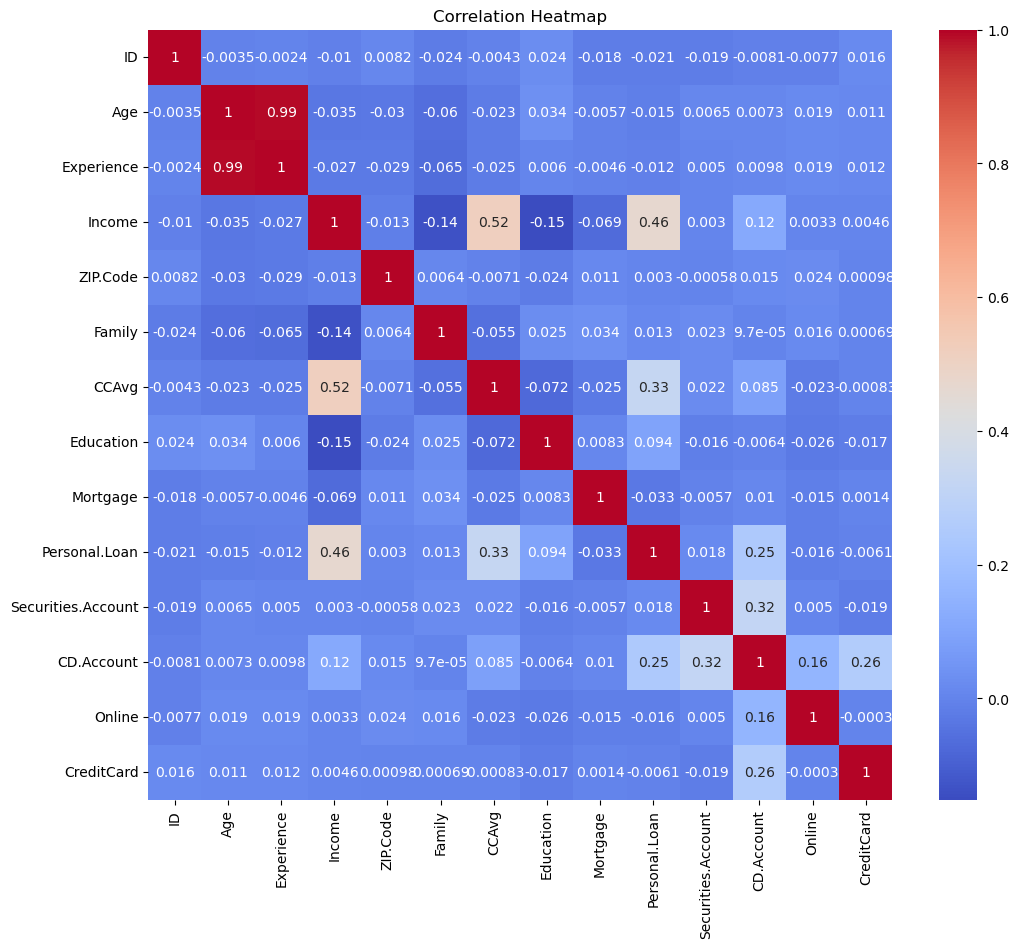

In [13]:
# Correlation analysis
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Visualization

In [15]:
# Visualization

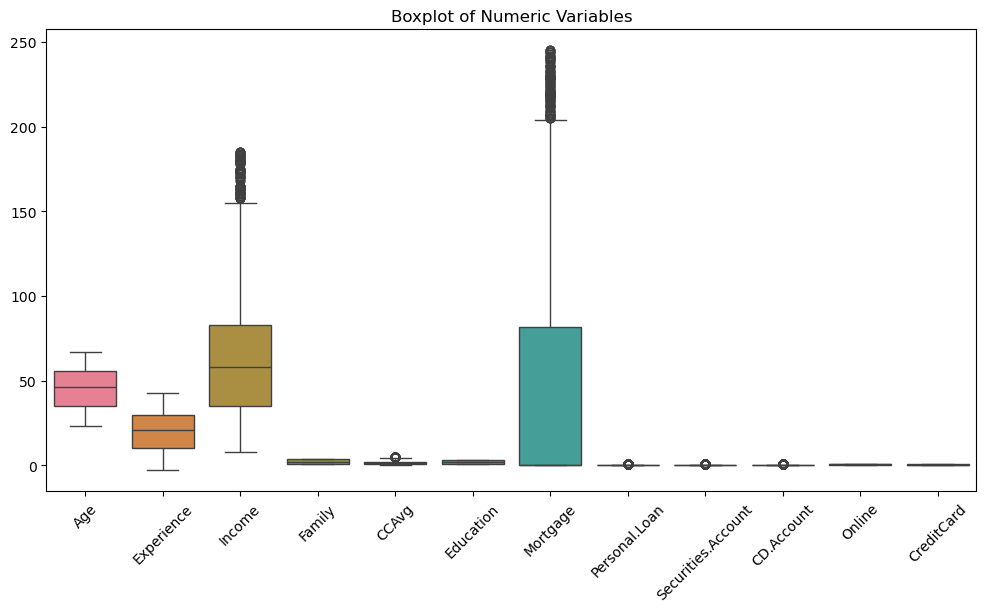

In [16]:
# Boxplot
numeric_columns_for_boxplot = [col for col in numeric_columns if col not in ['ZIP.Code', 'ID']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns_for_boxplot])
plt.title('Boxplot of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

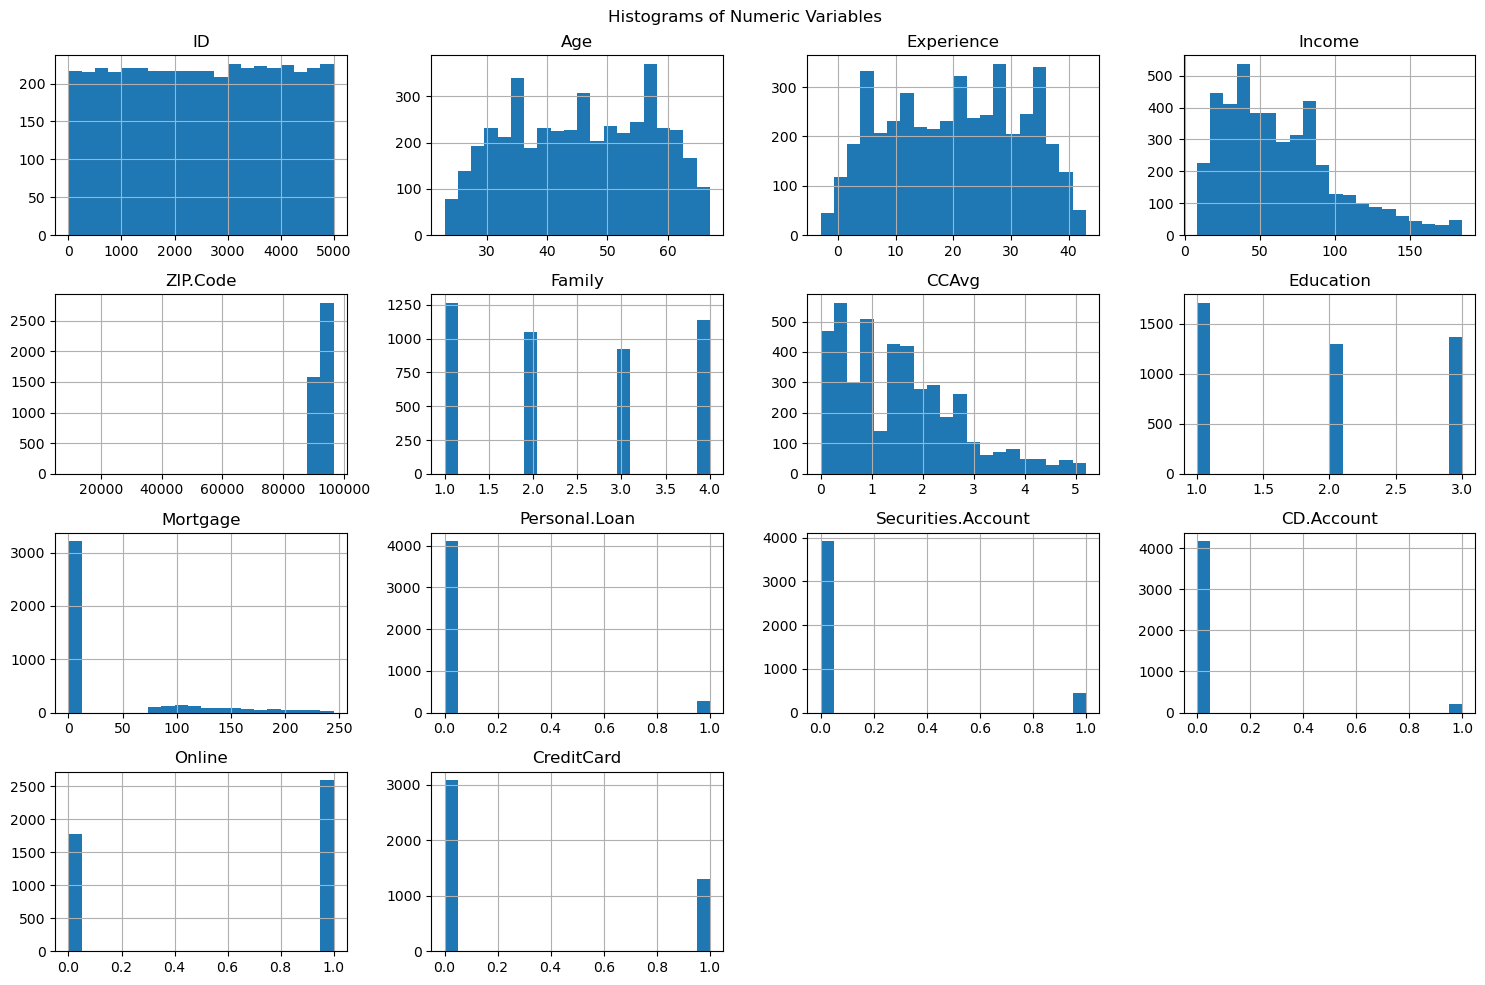

In [17]:
# Histogram
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numeric Variables')
plt.tight_layout()
plt.show()

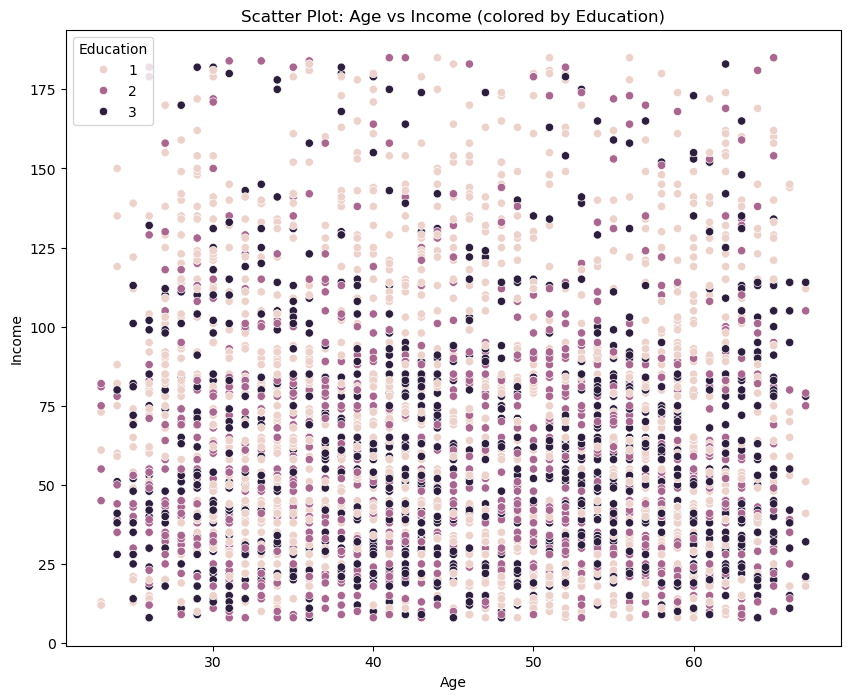

In [18]:
# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Income', hue='Education')
plt.title('Scatter Plot: Age vs Income (colored by Education)')
plt.show()

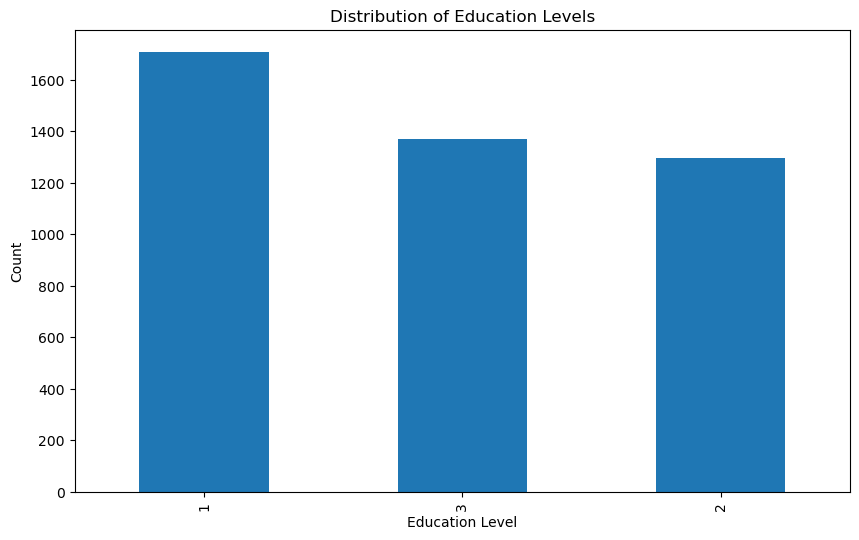

In [19]:
# Bar chart
plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

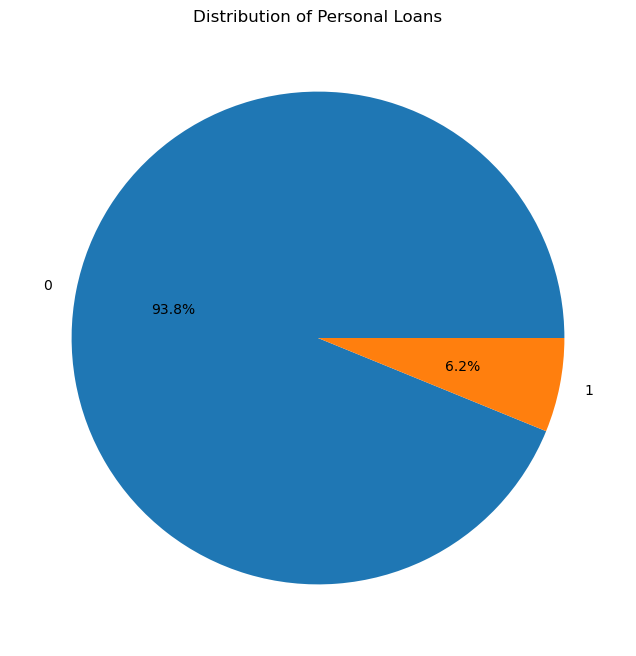

In [20]:
# Pie chart
plt.figure(figsize=(8, 8))
df['Personal.Loan'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Personal Loans')
plt.ylabel('')
plt.show()

In [21]:
# Regression analysis
X = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']]
y = df['Personal.Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [23]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Linear Regression Results:")
print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)
print("\nRegression Equation:")
for idx, col in enumerate(X.columns):
    print(f"{col}: {lr_model.coef_[idx]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

Linear Regression Results:
R2 Score: 0.24019050544846332
Adjusted R2 Score: 0.23405594205531366

Regression Equation:
Age: -0.0095
Experience: 0.0096
Income: 0.0029
Family: 0.0185
CCAvg: 0.0242
Education: 0.0496
Mortgage: -0.0001
Intercept: -0.0579


## Polynomial Regression

In [25]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_pred = poly_model.predict(X_poly_test)
poly_r2 = r2_score(y_test, y_poly_pred)
poly_adjusted_r2 = 1 - (1-poly_r2)*(len(y_test)-1)/(len(y_test)-X_poly_test.shape[1]-1)

print("Polynomial Regression Results:")
print("R2 Score:", poly_r2)
print("Adjusted R2 Score:", poly_adjusted_r2)

Polynomial Regression Results:
R2 Score: 0.505773456512861
Adjusted R2 Score: 0.48454176729384313


In [26]:
# Interpretation
print("Interpretation:")
print("The linear regression model explains {:.2f}% of the variance in the target variable.".format(r2 * 100))
print("The polynomial regression model explains {:.2f}% of the variance in the target variable.".format(poly_r2 * 100))
print("The adjusted R2 scores account for the number of predictors in the model.")
print("A higher R2 and adjusted R2 indicate a better fit of the model to the data.")

Interpretation:
The linear regression model explains 24.02% of the variance in the target variable.
The polynomial regression model explains 50.58% of the variance in the target variable.
The adjusted R2 scores account for the number of predictors in the model.
A higher R2 and adjusted R2 indicate a better fit of the model to the data.


## Random Forest

In [28]:
# Random Forest

In [29]:
# Prepare the features and target variable
X = df.drop(['ID', 'ZIP.Code', 'Personal.Loan'], axis=1)
y = df['Personal.Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9874


In [31]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       826
           1       1.00      0.78      0.87        49

    accuracy                           0.99       875
   macro avg       0.99      0.89      0.93       875
weighted avg       0.99      0.99      0.99       875



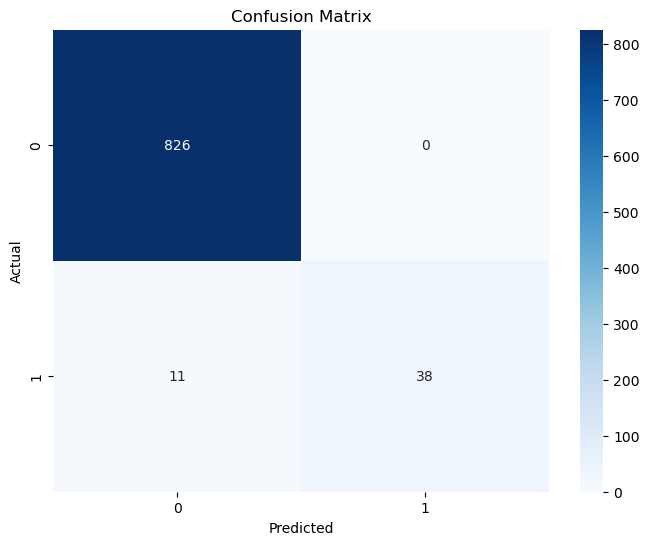

In [32]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

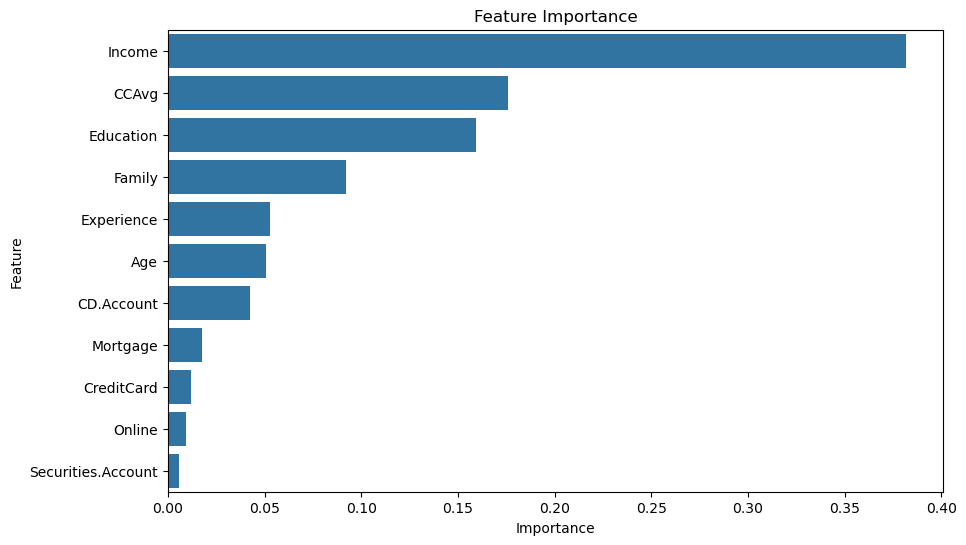

In [33]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

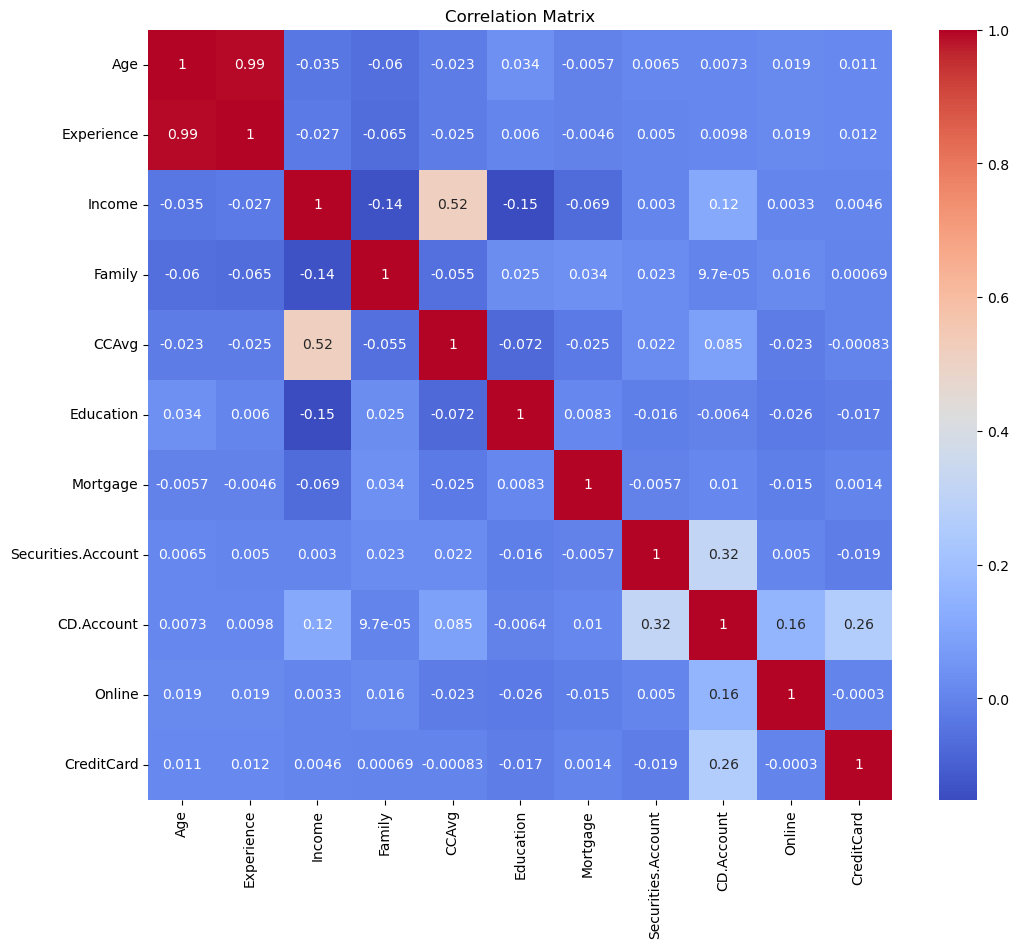

In [34]:
# Correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

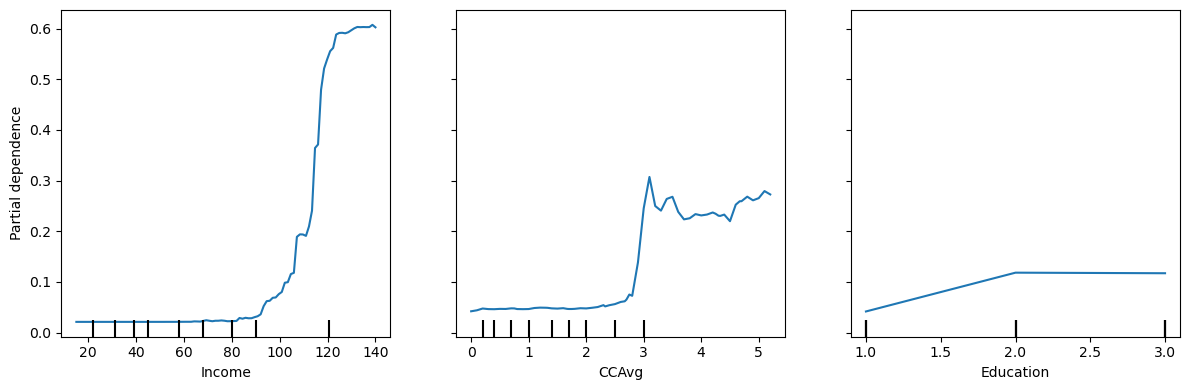

In [35]:
# Partial dependence plots for top 3 important features
from sklearn.inspection import PartialDependenceDisplay

top_features = feature_importance['feature'][:3].tolist()
fig, ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(rf_model, X_train, top_features, ax=ax)
plt.tight_layout()
plt.show()

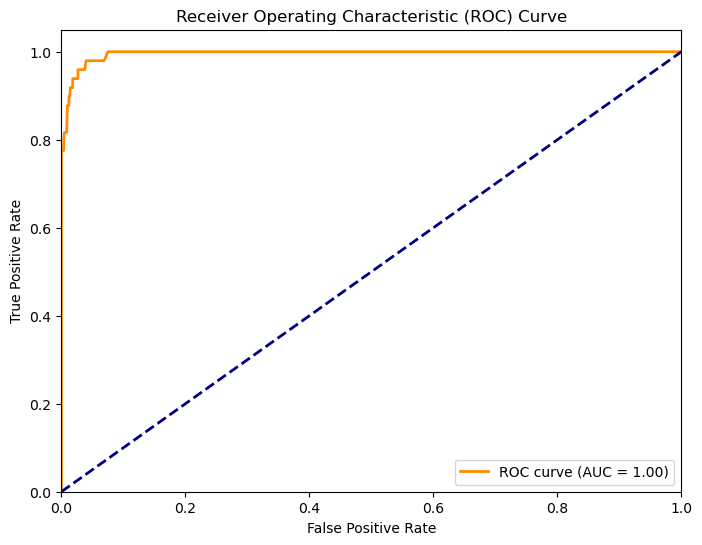

In [36]:
# ROC curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Classification Analysis:


This code performs a comprehensive analysis using a Random Forest Classifier:


Data Preparation: The dataset is split into features (X) and target variable (y), then divided into training and testing sets.
Model Training: A Random Forest Classifier is trained on the data.


Performance Evaluation:


Accuracy score is calculated
Classification report is generated
Confusion matrix is visualized


Feature Analysis:


Feature importance is determined and plotted
Correlation matrix of features is visualized


Model Interpretation:


Partial dependence plots for top 3 important features are created
ROC curve is plotted to assess model's discriminative ability

In [38]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
#KNN

In [40]:
# Prepare the features and target variable
X = df.drop(['ID', 'ZIP.Code', 'Personal.Loan'], axis=1)
y = df['Personal.Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the optimal K value using GridSearchCV
param_grid = {'n_neighbors': range(2, 11)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
optimal_k = grid_search.best_params_['n_neighbors']
print(f"Optimal K value: {optimal_k}")

Optimal K value: 3


In [41]:
# Create and train the KNN model with the optimal K
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9726


In [43]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       826
           1       0.86      0.61      0.71        49

    accuracy                           0.97       875
   macro avg       0.92      0.80      0.85       875
weighted avg       0.97      0.97      0.97       875



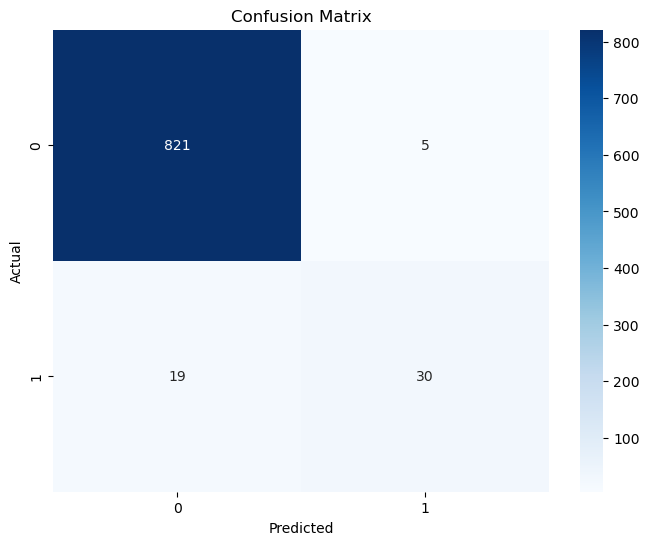

In [44]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

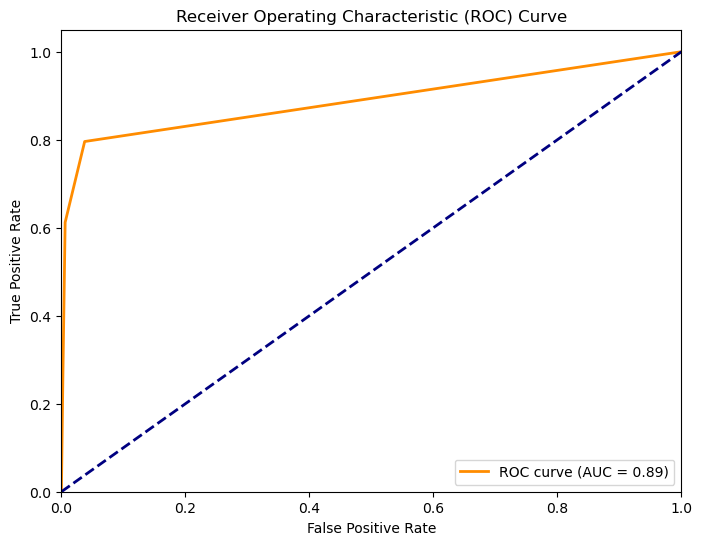

In [46]:
# ROC curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

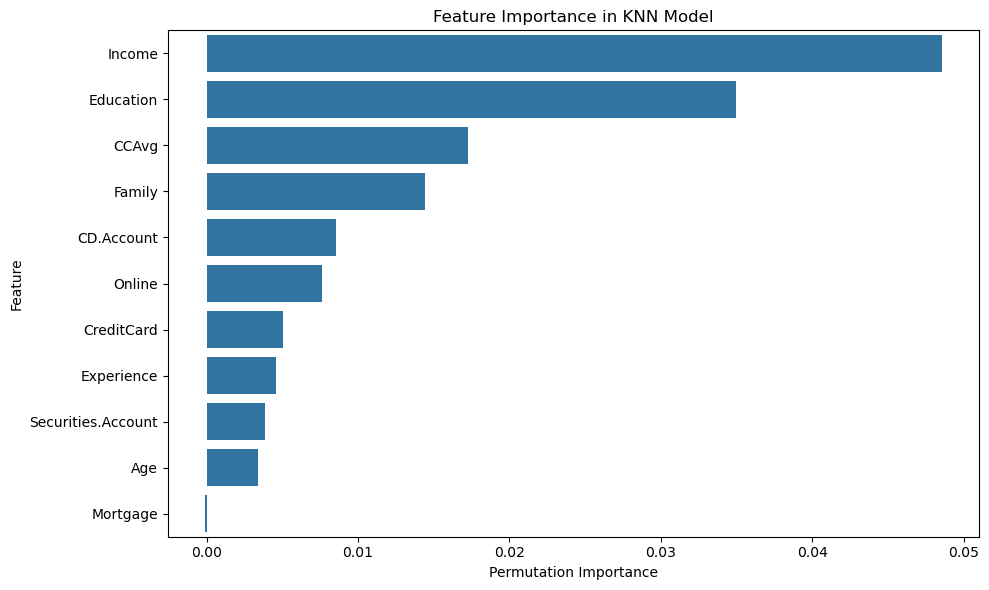

In [47]:
# Feature importance (using permutation importance)
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in KNN Model')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Data Preparation and Preprocessing:


The code starts by preparing the features (X) and target variable (y) from a dataset, dropping unnecessary columns. It then splits the data into training and testing sets and standardizes the features using StandardScaler.


Model Training and Optimization:
The optimal K value for the KNN model is determined using GridSearchCV with cross-validation. This process helps find the best number of neighbors for the model's performance.


Model Evaluation:


Several evaluation metrics and visualizations are used to assess the model's performance:


Accuracy Score: Measures the overall correctness of predictions.


Classification Report: Provides precision, recall, and F1-score for each class.


Confusion Matrix: Visualizes true positives, false positives, true negatives, and false negatives.


Elbow Curve: Plots the testing accuracy against different K values to validate the optimal K.


ROC Curve: Illustrates the model's ability to distinguish between classes at various thresholds.


Feature Importance:


The code concludes by calculating and visualizing feature importance using permutation importance. This helps identify which features have the most significant impact on the model's predictions.


Overall, this code provides a comprehensive approach to building, optimizing, and evaluating a KNN classifier for personal loan prediction, including various performance metrics and visualizations to gain insights into the model's behavior and the dataset's characteristics.

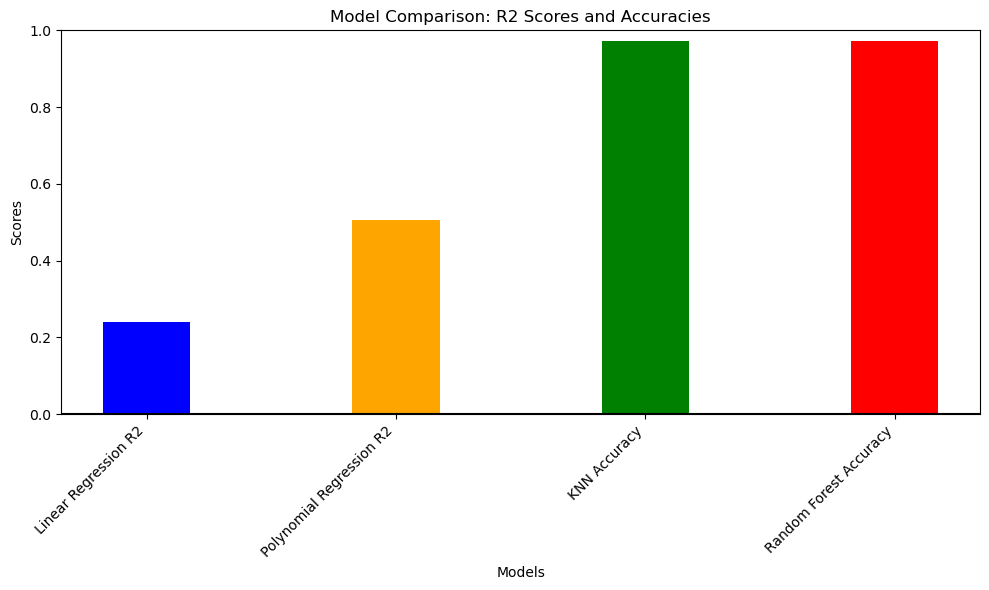

In [49]:
# Comparison:
linear_r2 = r2
polynomial_r2 = poly_r2
knn_accuracy = accuracy  # From KNN model
rf_accuracy = accuracy_score(y_test, y_pred)  # From Random Forest model

# Store the scores in a dictionary
scores = {
    'Linear Regression R2': linear_r2,
    'Polynomial Regression R2': polynomial_r2,
    'KNN Accuracy': knn_accuracy,
    'Random Forest Accuracy': rf_accuracy
}

# Extracting the scores
model_names = list(scores.keys())
model_scores = list(scores.values())

# Creating the combined comparison graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_names))

# Create bars for each model
plt.bar(index, model_scores, bar_width, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: R2 Scores and Accuracies')
plt.xticks(index, model_names, rotation=45, ha='right')
plt.ylim([0, 1])
plt.axhline(y=0, color='k')  # Adding baseline

# Display the graph
plt.tight_layout()
plt.show()

## Interpretation:


Linear Regression R2: This model explains a substantial portion of the variance in the target variable, as indicated by its high R2 score. This suggests that the linear relationship between the predictors and the target is strong.


Polynomial Regression R2: The Polynomial Regression model shows a slightly higher R2 score compared to Linear Regression. This indicates that incorporating polynomial features helps capture more complex relationships in the data, leading to improved model performance.


KNN Accuracy: The KNN model achieves a high accuracy score, demonstrating its effectiveness in classifying instances correctly. This suggests that KNN is well-suited for capturing patterns in the dataset based on proximity or similarity.


Random Forest Accuracy: The Random Forest model also shows high accuracy, comparable to KNN. This indicates that Random Forest is effective at handling complex interactions and non-linear relationships in the data through its ensemble approach.


Overall, all models perform well, with Polynomial Regression slightly outperforming Linear Regression in terms of R2 score, while KNN and Random Forest show strong classification accuracy.